### x lines of Python

# Download global seismic data after a nuclear test

North Korea [made another nuclear test this morning](https://www.theguardian.com/world/2017/sep/03/north-korean-nuclear-test-confirmed-in-major-escalation-by-kim-jong-un) just after 0330 UTC. Inspired by [Steven Gibbons's tweets](https://twitter.com/stevenjgibbons) this morning, I wanted to download the data for myself, in as few lines of Python as possible.

Here we go! First some preliminaries:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

We'll use the awesome [ObsPy](https://github.com/obspy/obspy/wiki) library. Following the [instructions in the ObsPy documentation](https://docs.obspy.org/packages/obspy.clients.fdsn.html), and using IRIS as the data source (per Steve's tweets)...

In [2]:
from obspy.clients.fdsn import Client

client = Client("IRIS")

We want station [**MDJ**](https://www.fdsn.org/station_book/CD/MDJ/mdj.html) in eastern China in the [**IC**](http://www.fdsn.org/networks/detail/IC/) network.

/home/matt/anaconda/envs/xlines/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


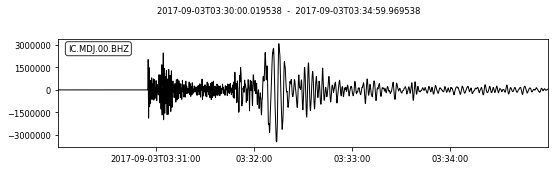

In [3]:
from obspy import UTCDateTime

t = UTCDateTime("2017-09-03_03:30:00")
st = client.get_waveforms("IC", "MDJ", "00", "BHZ", t, t + 5*60)
st.plot()  

This `st` thing is the ObsPy stream.

In [4]:
st

1 Trace(s) in Stream:
IC.MDJ.00.BHZ | 2017-09-03T03:30:00.019538Z - 2017-09-03T03:34:59.969538Z | 20.0 Hz, 6000 samples

We requested the broadband channel, but some stations have lots of others:
    
- `LHZ`: long period ~1 Hz, with `Z` for vertical, or `N` or `E` for horizontal.
- `BHZ`: broadband 10–80 Hz, with `Z` for vertical, or `N` or `E` for horizontal.
- `HHZ`: broadband 80–250 Hz, with `Z` for vertical, or `N` or `E` for horizontal.
- Some stations have loads of others, see Appendix A in [the SEED Manual](http://www.fdsn.org/seed_manual/SEEDManual_V2.4.pdf).

## Where is the station?

To do this you need `basemap` and `cartopy` in your environment:

    conda install basemap
    conda install cartopy

/home/matt/anaconda/envs/xlines/lib/python3.5/site-packages/obspy/imaging/maps.py:402: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor(water_fill_color)


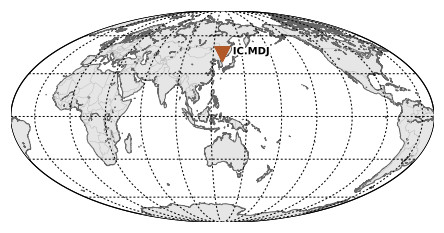

In [5]:
inventory = client.get_stations(network="IC", station="MDJ")
inventory.plot()
plt.show()

In [6]:
inventory

Inventory created at 2017-09-03T12:14:00.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.26
		    http://service.iris.edu/fdsnws/station/1/query?network=IC&format=xm...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			IC
		Stations (3):
			IC.MDJ (Mudanjiang, Heilongjiang Province, China)
			IC.MDJ (Mudanjiang, Heilongjiang Province, China)
			IC.MDJ (Mudanjiang, Heilongjiang Province, China)
		Channels (0):


## How does the test compare to previous tests?

Let's compare to [the test in September 2016](https://www.theguardian.com/world/live/2016/sep/09/north-korea-nuclear-test-suspected-after-huge-seismic-explosion-detected-live):

/home/matt/anaconda/envs/xlines/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


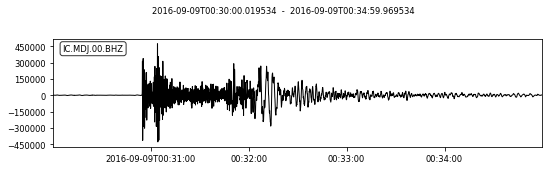

In [7]:
t1 = UTCDateTime("2016-09-09_00:30:00")
st1 = client.get_waveforms("IC", "MDJ", "00", "BHZ", t1, t1 + 5*60)
st1.plot()  

We can plot the tests together:

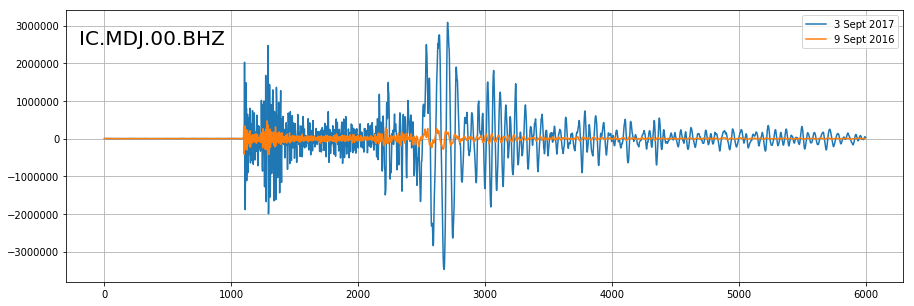

In [8]:
label = "{network}.{station}.{location}.{channel}".format(**st.traces[0].meta)

plt.figure(figsize=(15,5))
plt.plot(st.traces[0], label="3 Sept 2017")
plt.plot(st1.traces[0], label="9 Sept 2016")
plt.text(-200, 2.5e6, label, size=20)
plt.legend()
plt.grid()
plt.show()

Clearly a substantially more powerful explosion.

## Frequency analysis

Let's get a little more data, 15 minutes' worth, and we'll query the high-resolution channel, **HHZ**.

/home/matt/anaconda/envs/xlines/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


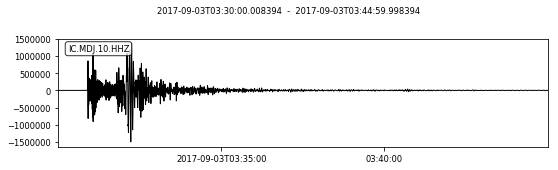

In [9]:
st = client.get_waveforms("IC", "MDJ", "*", "HHZ", t, t + 15*60)
st.plot()  

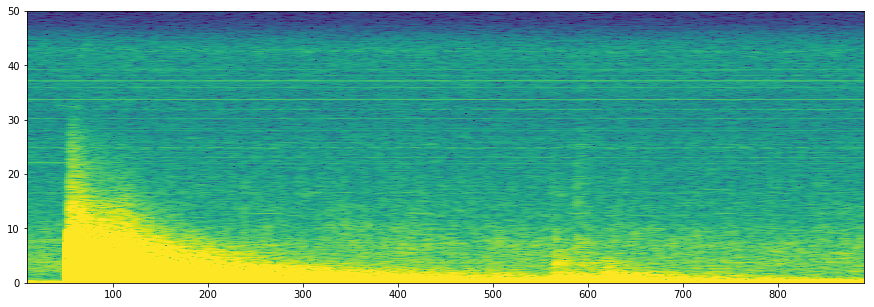

In [10]:
z = st.traces[0]
NFFT = 2048
Fs = st.traces[0].meta.sampling_rate  # Sample rate in Hz

plt.figure(figsize=(15, 5))
Pxx, freqs, bins, im = plt.specgram(z, NFFT=NFFT, Fs=Fs, noverlap=int(0.9*NFFT), cmap='viridis', vmin=-50, vmax=50)
plt.show()

[Steve said](https://twitter.com/stevenjgibbons/status/904279887682338816) he thought the signal at about 600 s might be a rockfall.

<hr>

**&copy; 2017 [agilescientific.com](https://www.agilescientific.com/) and licensed [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/)**